In [4]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [6]:
mustard_txt = pd.read_json("../../data/mustard.json")
mustard_txt

,160,170,180,190,1105,1162,1175,1182,1213,1276,...,2623,2131,2236,2546,2242,2169,2235,234,2608,2524
utterance,It's just a privilege to watch your mind at work.,I don't think I'll be able to stop thinking ab...,"Since it's not bee season, you can have my epi...","Lois Lane is falling, accelerating at an initi...",I'm just inferring this is a couch because the...,"Sheldon, if you were a robot, and I knew and y...",If you're compiling a mix CD for a double suic...,No. The dark crescent-shaped patterns under yo...,"How's this? ""Pleased to meet you, Dr. Gablehau...","Yeah, my parents felt that naming me Leonard a...",...,What do you know? Its a treat for the eyes and...,I really don't wanna sit with Allen Iverson ov...,"Gee, if only she were one and had no idea what...","Oh sure, she was probably up all night excited...",Are you still enjoying your nap?,"Hes not right for the part, and if I suggest h...","Oh yeah he has a caretaker his older brother, ...",Is it me or the greetings gone downhill around...,"You are right, by saying nice, I am virtually ...","Yes and we are ""very"" excited about it."
speaker,SHELDON,PENNY,SHELDON,SHELDON,SHELDON,HOWARD,SHELDON,SHELDON,SHELDON,LEONARD,...,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER,CHANDLER
context,[I never would have identified the fingerprint...,[This is one of my favorite places to kick bac...,"[Here we go. Pad thai, no peanuts., But does i...",[A marathon? How many Superman movies are ther...,"[Great Caesar's ghost, look at this place., So...","[On the other hand, no arousal., None?, None.,...","[Oh, good Lord., God, that's a good song.]","[How do I look?, Could you be more specific?, ...","[You know, I am not going to enjoy this party....",[He switched over to high-energy radiation res...,...,"[Chandler?, Hey! Ah!, What do you think?, I th...",[Wish I could switch with someone.],"[You can't go away this weekend, its Emma's bi...","[Hey, Hey, where's the birthday girl?, Oh she ...","[Okay?, Hi Emma, it's the year 2020.]","[What am I gonna do now?, Just pass the tape a...","[Helo! Anybody in there order a celebrity?, Wh...","[Hey, You son of a bitch!]","[Did I go to this school?, Hey, there's Missy ...","[Anyway, if you don't feel like being alone to..."
context_speakers,"[LEONARD, SHELDON]","[HOWARD, PENNY, HOWARD, HOWARD, HOWARD, PENNY,...","[LEONARD, HOWARD, LEONARD]","[PENNY, SHELDON, PENNY, SHELDON, SHELDON, PENN...","[SHELDON, LEONARD, SHELDON, SHELDON, SHELDON, ...","[PERSON, LEONARD, PERSON, LEONARD, PERSON, LEO...","[SHELDON, LEONARD]","[LEONARD, SHELDON, LEONARD]","[SHELDON, LEONARD, SHELDON, LEONARD, SHELDON, ...","[PERSON, PERSON, LEONARD, PERSON, LEONARD, PER...",...,"[PHOEBE, CHANDLER, MONICA, CHANDLER]",[CHANDLER],"[RACHEL, MONICA, RACHEL]","[MONICA, CHANDLER, RACHEL]","[ROSS, CHANDLER]","[CHANDLER, RACHEL]","[JOEY, PERSON, CHANDLER, PERSON]","[CHANDLER, JOEY]","[CHANDLER, ROSS, CHANDLER, ROSS]",[ROSS]
show,BBT,BBT,BBT,BBT,BBT,BBT,BBT,BBT,BBT,BBT,...,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS,FRIENDS
sarcasm,True,True,False,False,True,False,True,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [17]:
# We transpose the dataframe to get the columns right
mustard_txt = mustard_txt.transpose()
mustard_txt.head(5)

,utterance,speaker,context,context_speakers,show,sarcasm
160,It's just a privilege to watch your mind at work.,SHELDON,[I never would have identified the fingerprint...,"[LEONARD, SHELDON]",BBT,True
170,I don't think I'll be able to stop thinking ab...,PENNY,[This is one of my favorite places to kick bac...,"[HOWARD, PENNY, HOWARD, HOWARD, HOWARD, PENNY,...",BBT,True
180,"Since it's not bee season, you can have my epi...",SHELDON,"[Here we go. Pad thai, no peanuts., But does i...","[LEONARD, HOWARD, LEONARD]",BBT,False
190,"Lois Lane is falling, accelerating at an initi...",SHELDON,[A marathon? How many Superman movies are ther...,"[PENNY, SHELDON, PENNY, SHELDON, SHELDON, PENN...",BBT,False
1105,I'm just inferring this is a couch because the...,SHELDON,"[Great Caesar's ghost, look at this place., So...","[SHELDON, LEONARD, SHELDON, SHELDON, SHELDON, ...",BBT,True


In [23]:
print(mustard_txt.shape)
sarcastic_occ = mustard_txt.query('sarcasm==True')
sarcastic_occ.head()

(690, 6)


,utterance,speaker,context,context_speakers,show,sarcasm
160,It's just a privilege to watch your mind at work.,SHELDON,[I never would have identified the fingerprint...,"[LEONARD, SHELDON]",BBT,True
170,I don't think I'll be able to stop thinking ab...,PENNY,[This is one of my favorite places to kick bac...,"[HOWARD, PENNY, HOWARD, HOWARD, HOWARD, PENNY,...",BBT,True
1105,I'm just inferring this is a couch because the...,SHELDON,"[Great Caesar's ghost, look at this place., So...","[SHELDON, LEONARD, SHELDON, SHELDON, SHELDON, ...",BBT,True
1175,If you're compiling a mix CD for a double suic...,SHELDON,"[Oh, good Lord., God, that's a good song.]","[SHELDON, LEONARD]",BBT,True
1182,No. The dark crescent-shaped patterns under yo...,SHELDON,"[How do I look?, Could you be more specific?, ...","[LEONARD, SHELDON, LEONARD]",BBT,True


## Speaker proportions

Lets see which speakers dominate the sarcastic cases and what their percentages are

In [25]:
speaker_counts = sarcastic_occ['speaker'].value_counts()
speaker_counts

speaker
CHANDLER       120
SHELDON         45
DOROTHY         38
HOWARD          23
PENNY           23
LEONARD         19
PERSON          12
AMY              9
PHOEBE           8
RAJ              7
MODERATOR        7
RACHEL           7
MONICA           6
MEMBER-GIRL      5
ROSS             5
BERNADETTE       5
JOEY             3
MEMBER-BOY       2
ROSE             1
Name: count, dtype: int64

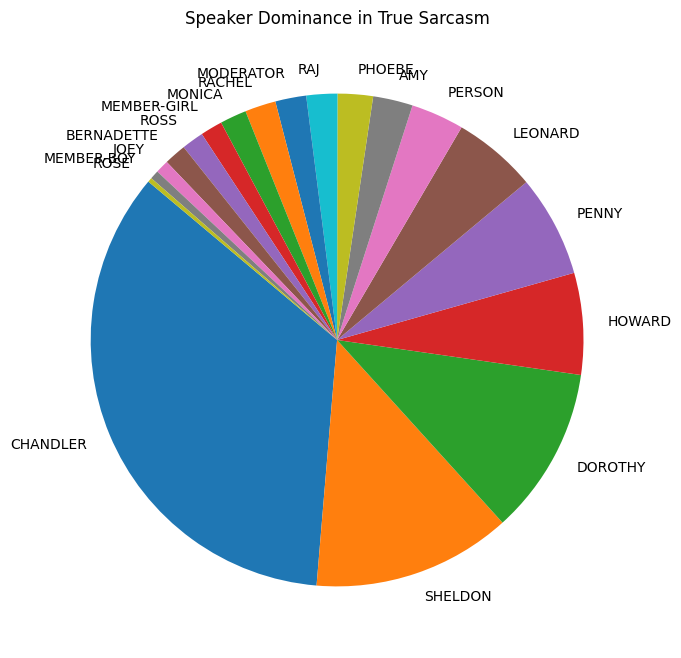

In [30]:
# Create a pie chart with a black background
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(speaker_counts, labels=speaker_counts.index, autopct='', startangle=140)
ax.set_title("Speaker Dominance in True Sarcasm")

# Function to show percentages on click
def on_click(event):
    if event.inaxes == ax:
        wedges, labels, percentages = ax.pie(
            speaker_counts, labels=speaker_counts.index, autopct='%1.1f%%', startangle=140
        )
        for label, percentage in zip(labels, percentages):
            label.set_text(f"{label.get_text()} ({percentage.get_text()})")
        plt.draw()

# Connect the click event to the function
fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()





